## Import required dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

## Get the data and pre-process it

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

c:\Users\Phani\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Model training

In [6]:
hist = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.1, verbose=1)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 86s 194ms/step - accuracy: 0.8359 - loss: 0.5247 - val_accuracy: 0.9832 - val_loss: 0.0592
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 95s 225ms/step - accuracy: 0.9714 - loss: 0.0941 - val_accuracy: 0.9880 - val_loss: 0.0407
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 85s 200ms/step - accuracy: 0.9789 - loss: 0.0711 - val_accuracy: 0.9890 - val_loss: 0.0396
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 73s 174ms/step - accuracy: 0.9844 - loss: 0.0521 - val_accuracy: 0.9907 - val_loss: 0.0350
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 71s 168ms/step - accuracy: 0.9869 - loss: 0.0419 - val_accuracy: 0.9905 - val_loss: 0.0396
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 71s 168ms/step - accuracy: 0.9864 - loss: 0.0429 - val_accuracy: 0.9913 - val_loss: 0.0385
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 73s 173ms/step - accuracy: 0.9893 - loss: 0.0344 - val_accuracy: 0.9920 - val_loss: 0.0296
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 72s 171ms/step - accuracy: 0.9902 - loss: 0

## Plot the performance

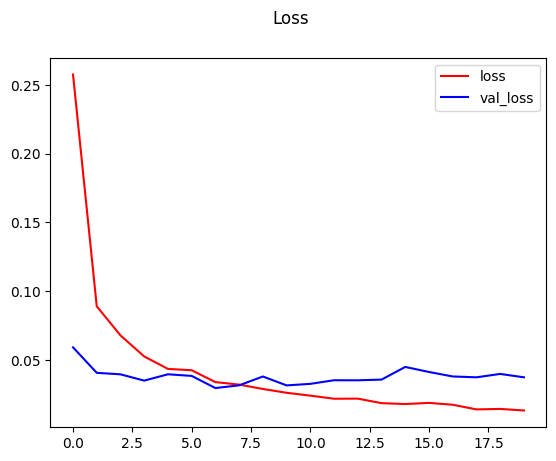

In [7]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'red', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'blue', label = 'val_loss')
fig.suptitle('Loss')
plt.legend()
plt.show()

## Save model

In [8]:
# .h5 format for older keras  version
model.save(os.path.join('model', 'hwdr_model.h5'))

# for new standard version
model.save(os.path.join('model', 'hwdr_model.keras'))

## Load and Evaluate the model

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9892 - loss: 0.0428
Test accuracy: 0.9920
